In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#Testing Jun 8th


Unique values in the second column:
['Bacteria;Actinobacteria'
 'Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae'
 'Bacteria;Actinobacteria;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae'
 'Bacteria;Actinobacteria;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium;Bifidobacterium animalis'
 'Bacteria;Actinobacteria;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium;Corynebacterium lipophiloflavum'
 'Bacteria;Actinobacteria;Actinobacteria;Corynebacteriales;Dietziaceae;Dietzia'
 'Bacteria;Actinobacteria;Coriobacteriia;Eggerthellales;Eggerthellaceae;Slackia'
 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides coprocola'
 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides eggerthii'
 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides finegoldii'
 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacte

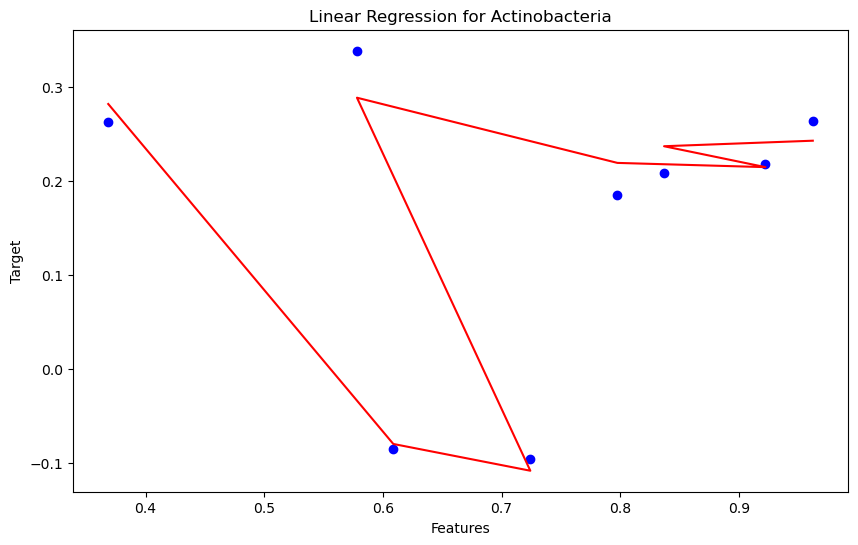

No data available for Linear Regression for Gammaproteobacteria


In [2]:
# Load the CSV file into a DataFrame
csv_file_path = '/Users/schoudhry/Desktop/Supplementary Tables S8 S8.csv'
df = pd.read_csv(csv_file_path)

# Assume the second column is named 'taxa' 
second_column_name = df.columns[1]
second_column = df[second_column_name]

# Sort the column and find matching values
sorted_column = second_column.sort_values()
matching_values = sorted_column[sorted_column.duplicated(keep=False)]

# Print the unique values to ensure we get the correct matching values
print("Unique values in the second column:")
print(matching_values.unique())

# Define the sets based on actual values found in the DataFrame
matching_values_set1 = [
    "Bacteria;Actinobacteria"
]

matching_values_set2 = [
    "Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacteriaceae"
]

# Filter the DataFrame to include only rows with matching values from set 1
filtered_df_set1 = df[df[second_column_name].isin(matching_values_set1)]

# Filter the DataFrame to include only rows with matching values from set 2
filtered_df_set2 = df[df[second_column_name].isin(matching_values_set2)]

# Print the filtered DataFrames to debug
print("\nFiltered DataFrame for Actinobacteria:")
print(filtered_df_set1)
print("\nFiltered DataFrame for Gammaproteobacteria:")
print(filtered_df_set2)

# Extract relevant columns (3, 4, 6, 7)
columns_of_interest = [df.columns[2], df.columns[3], df.columns[5], df.columns[6]]
filtered_df_set1 = filtered_df_set1[columns_of_interest]
filtered_df_set2 = filtered_df_set2[columns_of_interest]

# Ensure the columns are numeric
filtered_df_set1 = filtered_df_set1.apply(pd.to_numeric, errors='coerce').dropna()
filtered_df_set2 = filtered_df_set2.apply(pd.to_numeric, errors='coerce').dropna()

# Print shapes to debug
print("Shape of filtered_df_set1:", filtered_df_set1.shape)
print("Shape of filtered_df_set2:", filtered_df_set2.shape)

# Function to perform and plot linear regression
def linear_regression_analysis(X, y, title):
    if X.shape[0] == 0 or y.shape[0] == 0:
        print(f"No data available for {title}")
        return

    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], y, color='blue')
    plt.plot(X[:, 0], y_pred, color='red')
    plt.xlabel('Features')
    plt.ylabel('Target')
    plt.title(title)
    plt.show()

# Prepare the data for linear regression for set 1
X_set1 = filtered_df_set1[filtered_df_set1.columns[:-1]].values
y_set1 = filtered_df_set1[filtered_df_set1.columns[-1]].values

# Prepare the data for linear regression for set 2
X_set2 = filtered_df_set2[filtered_df_set2.columns[:-1]].values
y_set2 = filtered_df_set2[filtered_df_set2.columns[-1]].values

# Perform linear regression and plot for set 1
linear_regression_analysis(X_set1, y_set1, 'Linear Regression for Actinobacteria')

# Perform linear regression and plot for set 2
linear_regression_analysis(X_set2, y_set2, 'Linear Regression for Gammaproteobacteria')


In [3]:
# /Users/schoudhry/Desktop/Supplementary Tables S8 S8.csv

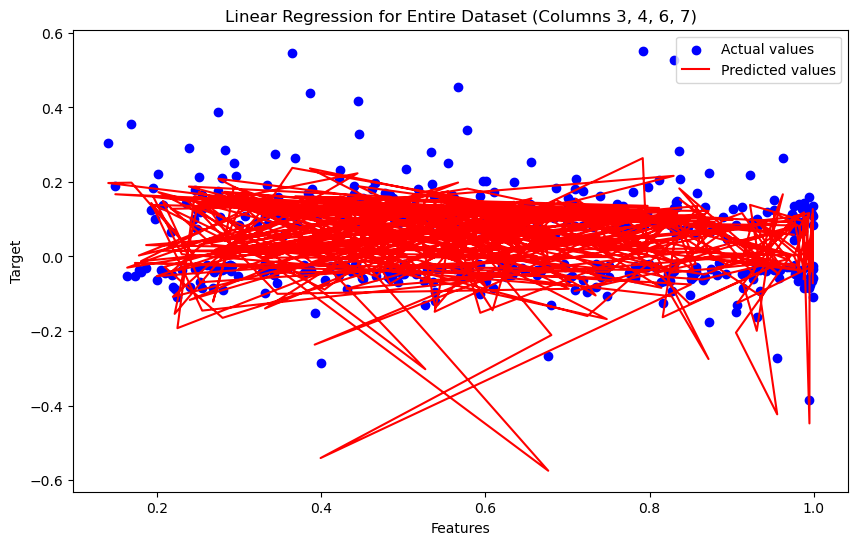

In [4]:
# Load the CSV file into a DataFrame
csv_file_path = '/Users/schoudhry/Desktop/Supplementary Tables S8 S8.csv'
df = pd.read_csv(csv_file_path)

# Extract relevant columns (3, 4, 6, 7)
columns_of_interest = [df.columns[2], df.columns[3], df.columns[5], df.columns[6]]
filtered_df = df[columns_of_interest]

# Ensure the columns are numeric and drop rows with missing values
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce').dropna()

# Prepare the data for linear regression
X = filtered_df[filtered_df.columns[:-1]].values
y = filtered_df[filtered_df.columns[-1]].values

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Actual values')
plt.plot(X[:, 0], y_pred, color='red', label='Predicted values')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression for Entire Dataset (Columns 3, 4, 6, 7)')
plt.legend()
plt.show()


Matching values in the second column:
599    Bacteria;Actinobacteria;Actinobacteria;Actinom...
688    Bacteria;Actinobacteria;Actinobacteria;Actinom...
689    Bacteria;Actinobacteria;Actinobacteria;Actinom...
71     Bacteria;Actinobacteria;Actinobacteria;Actinom...
703    Bacteria;Actinobacteria;Actinobacteria;Actinom...
                             ...                        
512                                   Bacteria;TM7;TM7-3
500                 Bacteria;Tenericutes;Mollicutes;RF39
519                 Bacteria;Tenericutes;Mollicutes;RF39
343    Bacteria;Verrucomicrobia;Verrucomicrobiae;Verr...
144    Bacteria;Verrucomicrobia;Verrucomicrobiae;Verr...
Name: Unnamed: 1, Length: 708, dtype: object


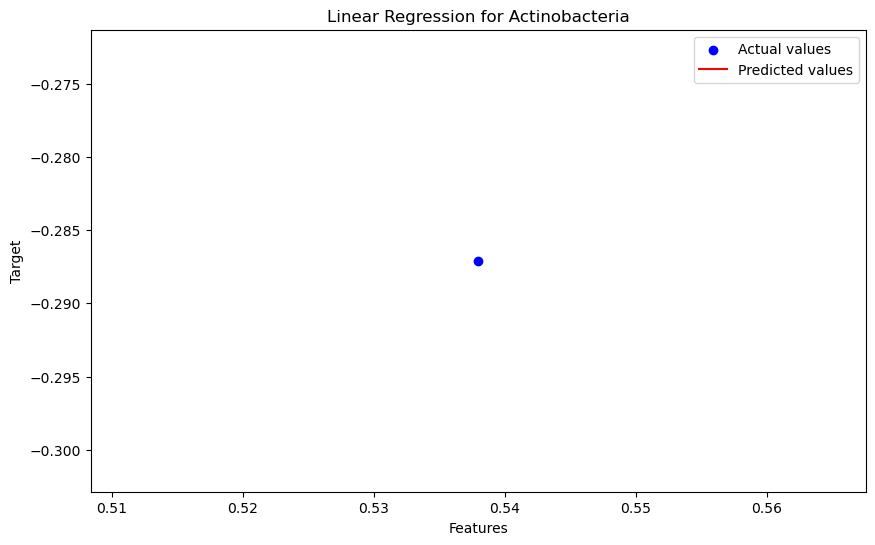

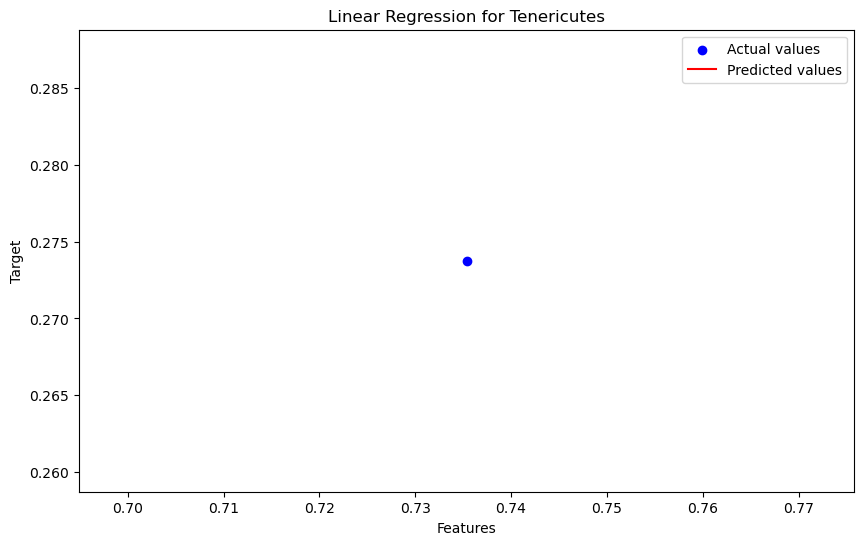

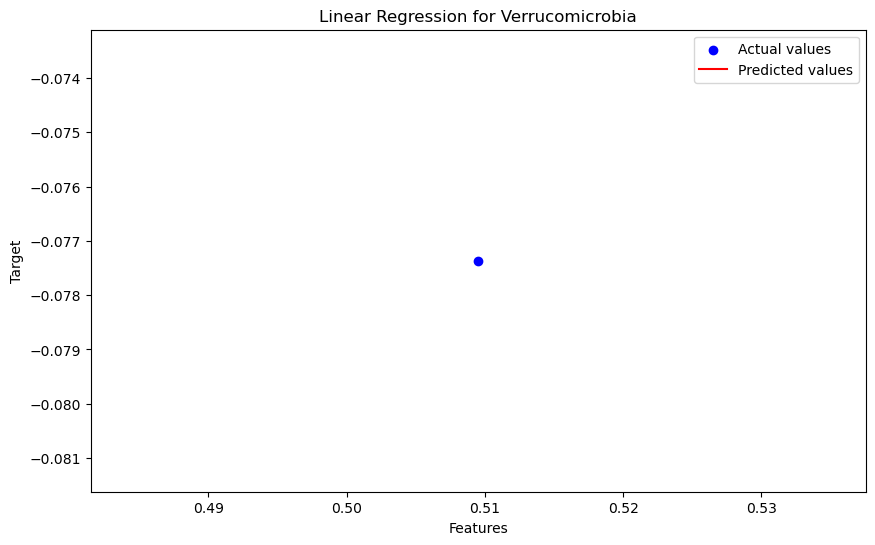

In [5]:
csv_file_path6 = '/Users/schoudhry/Desktop/Supplementary Tables S6 S6.csv'
df6 = pd.read_csv(csv_file_path6)

# Assume the second column is named 'taxa'
column_name6 = df6.columns[1]
scnd_column6 = df6[column_name6]

# Sort the column
sorted_column6 = scnd_column6.sort_values()

# Find and print matching values
matching_values6 = sorted_column6[sorted_column6.duplicated(keep=False)]

print("Matching values in the second column:")
print(matching_values6)

# Define matching value sets
matching_values_set1_6 = ["Bacteria;Actinobacteria"]
matching_values_set2_6 = ["Bacteria;Tenericutes"]
matching_values_set3_6 = ["Bacteria;Verrucomicrobia"]

# Filter the DataFrame to include only rows with matching values from set 1
filtered_df_set1_6 = df6[df6[column_name6].isin(matching_values_set1_6)]

# Filter the DataFrame to include only rows with matching values from set 2
filtered_df_set2_6 = df6[df6[column_name6].isin(matching_values_set2_6)]

# Filter the DataFrame to include only rows with matching values from set 3
filtered_df_set3_6 = df6[df6[column_name6].isin(matching_values_set3_6)]

# Function to perform linear regression and plot
def linear_regression_analysis(X, y, title):
    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], y, color='blue', label='Actual values')
    plt.plot(X[:, 0], y_pred, color='red', label='Predicted values')
    plt.xlabel('Features')
    plt.ylabel('Target')
    plt.title(title)
    plt.legend()
    plt.show()

# Perform linear regression and plot for each filtered DataFrame set
def analyze_set(filtered_df, title):
    # Extract relevant columns (3, 4, 6, 7)
    columns_of_interest = [filtered_df.columns[2], filtered_df.columns[3], filtered_df.columns[5], filtered_df.columns[6]]
    filtered_data = filtered_df[columns_of_interest]

    # Ensure the columns are numeric and drop rows with missing values
    filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce').dropna()

    # Prepare the data for linear regression
    X = filtered_data[filtered_data.columns[:-1]].values
    y = filtered_data[filtered_data.columns[-1]].values

    # Perform linear regression
    linear_regression_analysis(X, y, title)

# Analyze each set
analyze_set(filtered_df_set1_6, 'Linear Regression for Actinobacteria')
analyze_set(filtered_df_set2_6, 'Linear Regression for Tenericutes')
analyze_set(filtered_df_set3_6, 'Linear Regression for Verrucomicrobia')

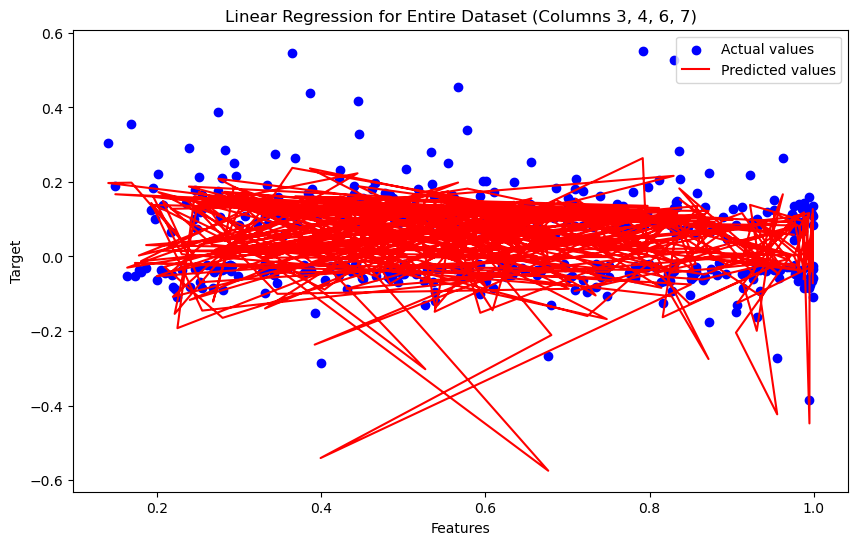

In [6]:
# Load the CSV file into a DataFrame
csv_file_path5 = '/Users/schoudhry/Desktop/Supplementary Tables S5.csv'
df5 = pd.read_csv(csv_file_path5)

# Extract relevant columns (4, 5, 6, 7)
columns_of_interest5 = [df5.columns[3], df5.columns[4], df5.columns[5], df5.columns[6]]
filtered_df5 = df[columns_of_interest]

# Ensure the columns are numeric and drop rows with missing values
filtered_df5 = filtered_df5.apply(pd.to_numeric, errors='coerce').dropna()

# Prepare the data for linear regression
X = filtered_df5[filtered_df.columns[:-1]].values
y = filtered_df5[filtered_df.columns[-1]].values

# Perform linear regression
regressor5 = LinearRegression()
regressor5.fit(X, y)
y_pred5 = regressor5.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Actual values')
plt.plot(X[:, 0], y_pred, color='red', label='Predicted values')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression for Entire Dataset (Columns 3, 4, 6, 7)')
plt.legend()
plt.show()

Matching values in the second column:
599    Bacteria;Actinobacteria;Actinobacteria;Actinom...
688    Bacteria;Actinobacteria;Actinobacteria;Actinom...
689    Bacteria;Actinobacteria;Actinobacteria;Actinom...
71     Bacteria;Actinobacteria;Actinobacteria;Actinom...
703    Bacteria;Actinobacteria;Actinobacteria;Actinom...
                             ...                        
512                                   Bacteria;TM7;TM7-3
500                 Bacteria;Tenericutes;Mollicutes;RF39
519                 Bacteria;Tenericutes;Mollicutes;RF39
343    Bacteria;Verrucomicrobia;Verrucomicrobiae;Verr...
144    Bacteria;Verrucomicrobia;Verrucomicrobiae;Verr...
Name: Unnamed: 1, Length: 708, dtype: object


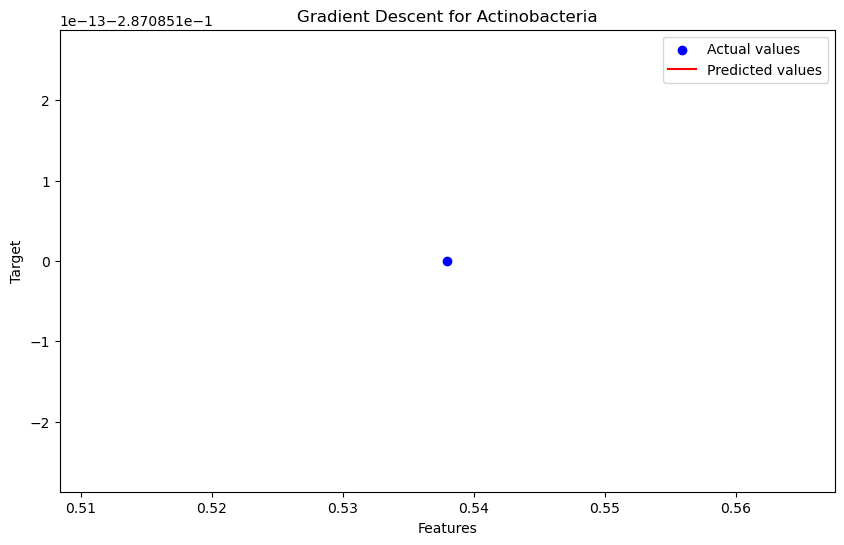

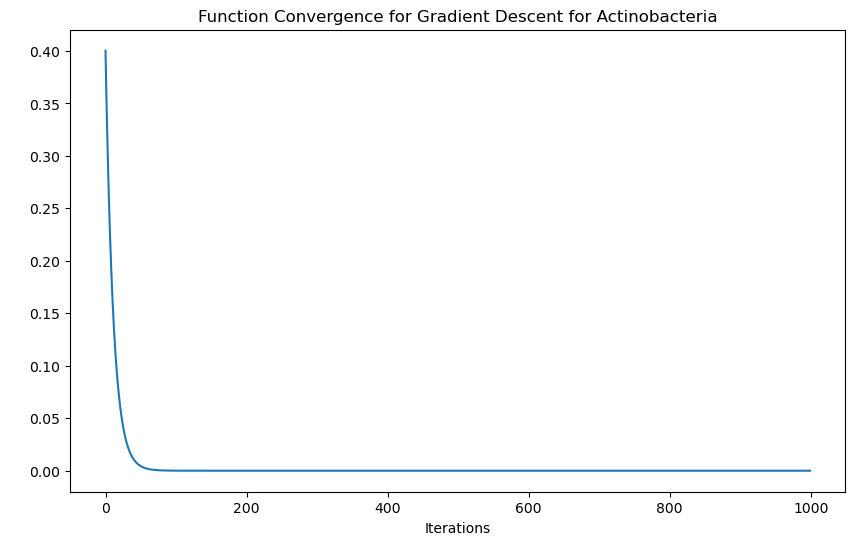

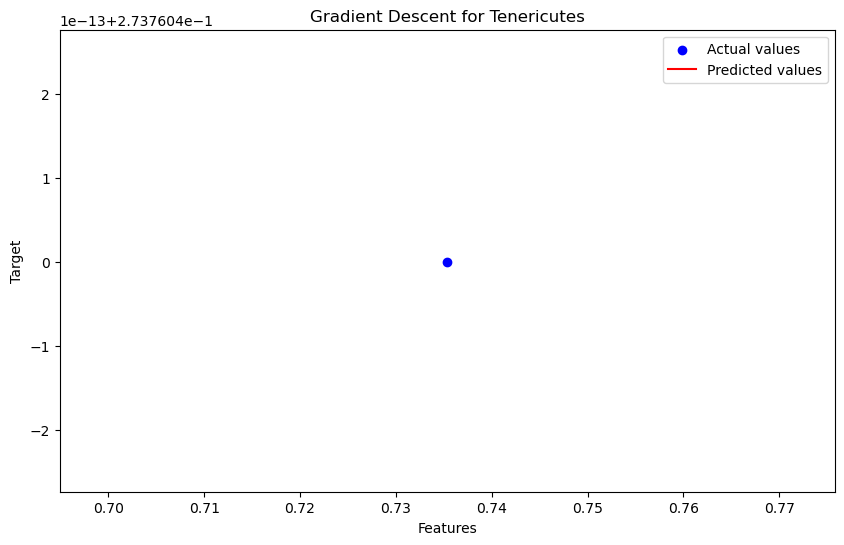

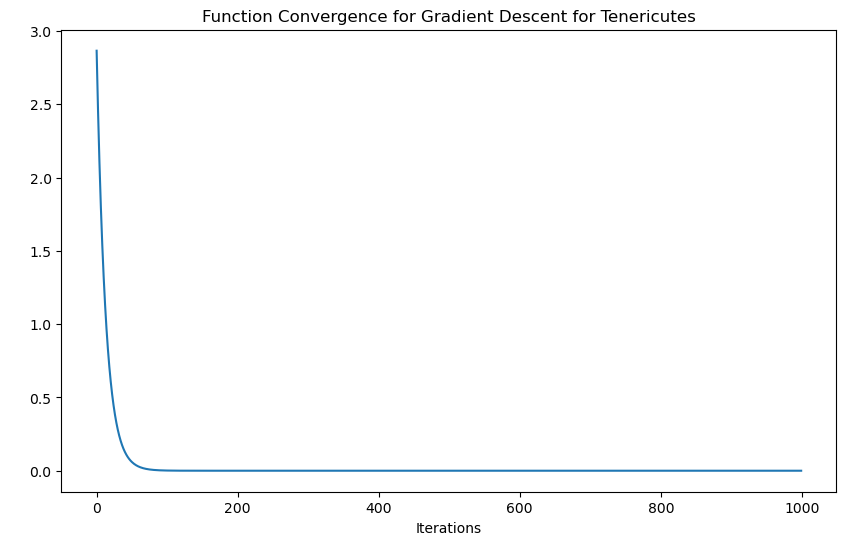

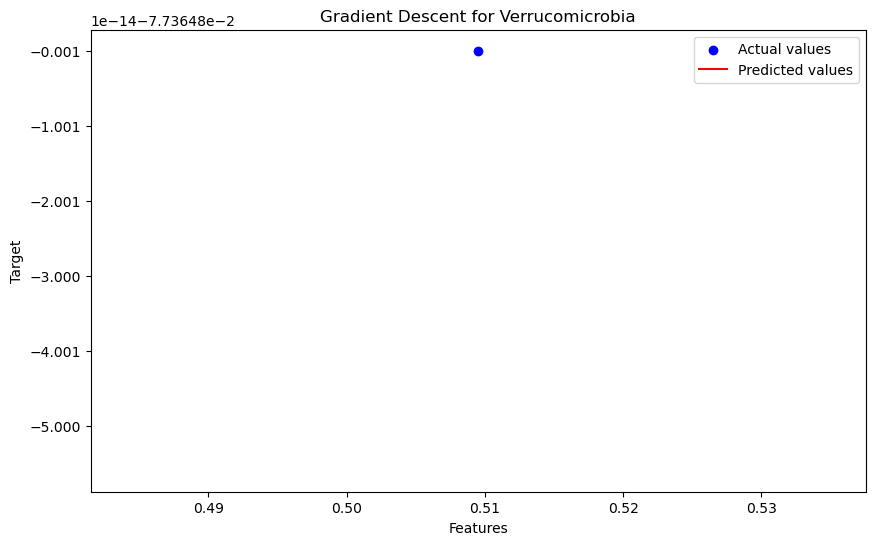

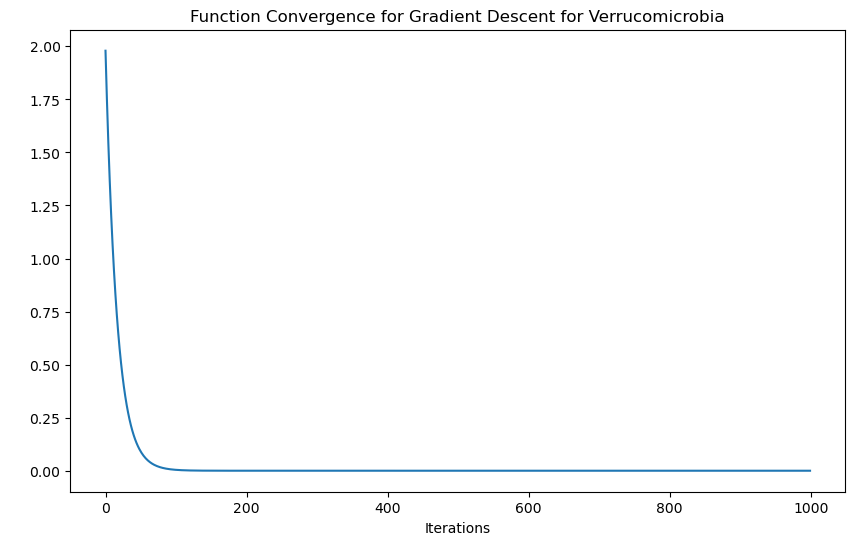

In [7]:

# Load the CSV file into a DataFrame
csv_file_path6 = '/Users/schoudhry/Desktop/Supplementary Tables S6 S6.csv'
df6 = pd.read_csv(csv_file_path6)

# Assume the second column is named 'taxa'
column_name6 = df6.columns[1]
scnd_column6 = df6[column_name6]

# Sort the column
sorted_column6 = scnd_column6.sort_values()

# Find and print matching values
matching_values6 = sorted_column6[sorted_column6.duplicated(keep=False)]

print("Matching values in the second column:")
print(matching_values6)

# Define matching value sets
matching_values_set1_6 = ["Bacteria;Actinobacteria"]
matching_values_set2_6 = ["Bacteria;Tenericutes"]
matching_values_set3_6 = ["Bacteria;Verrucomicrobia"]

# Filter the DataFrame to include only rows with matching values from set 1
filtered_df_set1_6 = df6[df6[column_name6].isin(matching_values_set1_6)]

# Filter the DataFrame to include only rows with matching values from set 2
filtered_df_set2_6 = df6[df6[column_name6].isin(matching_values_set2_6)]

# Filter the DataFrame to include only rows with matching values from set 3
filtered_df_set3_6 = df6[df6[column_name6].isin(matching_values_set3_6)]

# Function to perform gradient descent
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    theta = np.random.randn(X_b.shape[1])
    cost_history = []

    for _ in range(iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = (1/m) * np.sum((X_b.dot(theta) - y) ** 2)
        cost_history.append(cost)
    
    return theta, cost_history

# Function to perform gradient descent and plot
def gradient_descent_analysis(X, y, title):
    theta, cost_history = gradient_descent(X, y)
    y_pred = np.c_[np.ones((X.shape[0], 1)), X].dot(theta)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], y, color='blue', label='Actual values')
    plt.plot(X[:, 0], y_pred, color='red', label='Predicted values')
    plt.xlabel('Features')
    plt.ylabel('Target')
    plt.title(title)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel(' ')
    plt.title(f'Function Convergence for {title}')
    plt.show()

# Perform gradient descent and plot for each filtered DataFrame set
def analyze_set(filtered_df, title):
    # Extract relevant columns (3, 4, 6, 7)
    columns_of_interest = [filtered_df.columns[2], filtered_df.columns[3], filtered_df.columns[5], filtered_df.columns[6]]
    filtered_data = filtered_df[columns_of_interest]

    # Ensure the columns are numeric and drop rows with missing values
    filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce').dropna()

    # Prepare the data for gradient descent
    X = filtered_data[filtered_data.columns[:-1]].values
    y = filtered_data[filtered_data.columns[-1]].values

    # Perform gradient descent
    gradient_descent_analysis(X, y, title)

# Analyze each set
analyze_set(filtered_df_set1_6, 'Gradient Descent for Actinobacteria')
analyze_set(filtered_df_set2_6, 'Gradient Descent for Tenericutes')
analyze_set(filtered_df_set3_6, 'Gradient Descent for Verrucomicrobia')


Unique values in the second column:
['Bacteria;Actinobacteria'
 'Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae'
 'Bacteria;Actinobacteria;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae'
 'Bacteria;Actinobacteria;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium;Bifidobacterium animalis'
 'Bacteria;Actinobacteria;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium;Corynebacterium lipophiloflavum'
 'Bacteria;Actinobacteria;Actinobacteria;Corynebacteriales;Dietziaceae;Dietzia'
 'Bacteria;Actinobacteria;Coriobacteriia;Eggerthellales;Eggerthellaceae;Slackia'
 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides coprocola'
 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides eggerthii'
 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides finegoldii'
 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacte

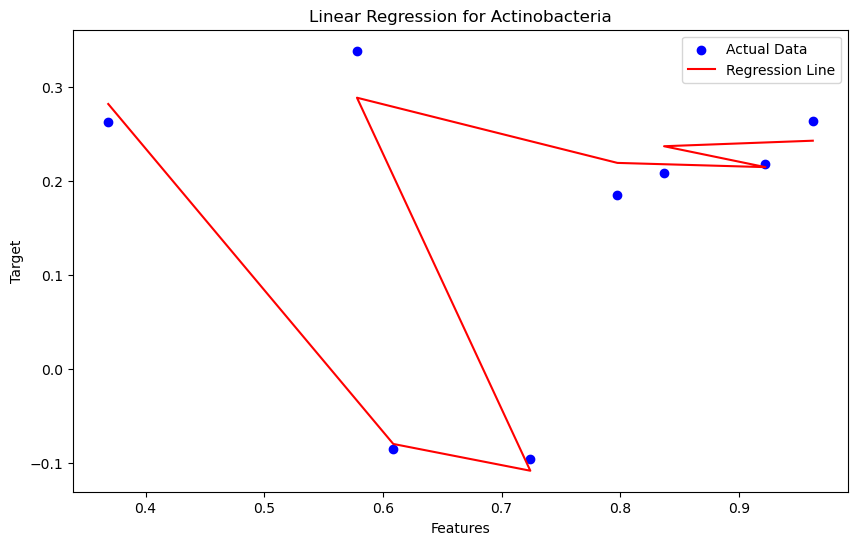

Linear Regression for Actinobacteria - R-squared: 0.97
Linear Regression for Actinobacteria - Mean Squared Error: 0.00
No data available for Linear Regression for Gammaproteobacteria


In [8]:

# Load the CSV file into a DataFrame
csv_file_path = '/Users/schoudhry/Desktop/Supplementary Tables S8 S8.csv'
df = pd.read_csv(csv_file_path)

# Assume the second column is named 'taxa' 
second_column_name = df.columns[1]
second_column = df[second_column_name]

# Sort the column and find matching values
sorted_column = second_column.sort_values()
matching_values = sorted_column[sorted_column.duplicated(keep=False)]

# Print the unique values to ensure we get the correct matching values
print("Unique values in the second column:")
print(matching_values.unique())

# Define the sets based on actual values found in the DataFrame
matching_values_set1 = [
    "Bacteria;Actinobacteria"
]

matching_values_set2 = [
    "Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacteriaceae"
]

# Filter the DataFrame to include only rows with matching values from set 1
filtered_df_set1 = df[df[second_column_name].isin(matching_values_set1)]

# Filter the DataFrame to include only rows with matching values from set 2
filtered_df_set2 = df[df[second_column_name].isin(matching_values_set2)]

# Print the filtered DataFrames to debug
print("\nFiltered DataFrame for Actinobacteria:")
print(filtered_df_set1)
print("\nFiltered DataFrame for Gammaproteobacteria:")
print(filtered_df_set2)

# Extract relevant columns (3, 4, 6, 7)
columns_of_interest = [df.columns[2], df.columns[3], df.columns[5], df.columns[6]]
filtered_df_set1 = filtered_df_set1[columns_of_interest]
filtered_df_set2 = filtered_df_set2[columns_of_interest]

# Ensure the columns are numeric
filtered_df_set1 = filtered_df_set1.apply(pd.to_numeric, errors='coerce').dropna()
filtered_df_set2 = filtered_df_set2.apply(pd.to_numeric, errors='coerce').dropna()

# Print shapes to debug
print("Shape of filtered_df_set1:", filtered_df_set1.shape)
print("Shape of filtered_df_set2:", filtered_df_set2.shape)

# Function to perform and plot linear regression
def linear_regression_analysis(X, y, title):
    if X.shape[0] == 0 or y.shape[0] == 0:
        print(f"No data available for {title}")
        return

    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    # Calculate R-squared and Mean Squared Error
    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], y, color='blue', label='Actual Data')
    plt.plot(X[:, 0], y_pred, color='red', label='Regression Line')
    plt.xlabel('Features')
    plt.ylabel('Target')
    plt.title(title)
    plt.legend()
    plt.show()

    # Print accuracy metrics
    print(f"{title} - R-squared: {r_squared:.2f}")
    print(f"{title} - Mean Squared Error: {mse:.2f}")

# Prepare the data for linear regression for set 1
X_set1 = filtered_df_set1[filtered_df_set1.columns[:-1]].values
y_set1 = filtered_df_set1[filtered_df_set1.columns[-1]].values

# Prepare the data for linear regression for set 2
X_set2 = filtered_df_set2[filtered_df_set2.columns[:-1]].values
y_set2 = filtered_df_set2[filtered_df_set2.columns[-1]].values

# Perform linear regression and plot for set 1
linear_regression_analysis(X_set1, y_set1, 'Linear Regression for Actinobacteria')

# Perform linear regression and plot for set 2
linear_regression_analysis(X_set2, y_set2, 'Linear Regression for Gammaproteobacteria')
